In [ ]:
# 컬럼 분석 방식은 데이터 유형 & 분석 목표에 따라 달라져야 함
# 숫자형 : 값의 분포와 변환을 중점으로 처리
# 범주형 : 그훕화와 인코딩을 중심으로 분석
# 텍스트 : 전처리와 특성 추출에 초첨을 맞춤

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras #없을 시 !pip install keras 명령어 사용해서 설치
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.fliterings('ignore')

%matplotlib inline


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [39]:
os.listdir("./titanic_data") #해당 파일에 어떤 파일이 들어 있는지 확인

['gender_submission.csv', 'test.csv', 'train.csv']

In [7]:
df_train = pd.read_csv('titanic_data/train.csv')
df_test = pd.read_csv('titanic_data/test.csv')
df_submission = pd.read_csv('titanic_data/gender_submission.csv')

In [19]:
df_train.shape,df_test.shape,df_submission.shape

((891, 12), (418, 11), (418, 2))

In [101]:
df_train.columns
#df_test.columns
#df_submission.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_cat'],
      dtype='object')

In [22]:
df_train.head()
#df_test.head()
#df_submission.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [95]:
df_train.dtypes
#df_test.dtypes
#df_submission.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Initial         object
Age_cat          int64
dtype: object

In [31]:
df_train.describe()
#df_test.describe()
#df_submission.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
#df_train.isnull() #결측값 확인 / 결측값 - TRUE, 값이 있으면 - FLASE 
df_train.isnull().sum()

#열의 개수를 알고 싶으면 shape[1]
df_train.shape[0] #행의 총 개수
#df_train.isnull().sum() / df_train.shape[0] : 각 열에서 결측값의 개수를 구하고 / 행 수 = 결측값 비율 
#df_test.isnull().sum() / df_test.shape[0]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

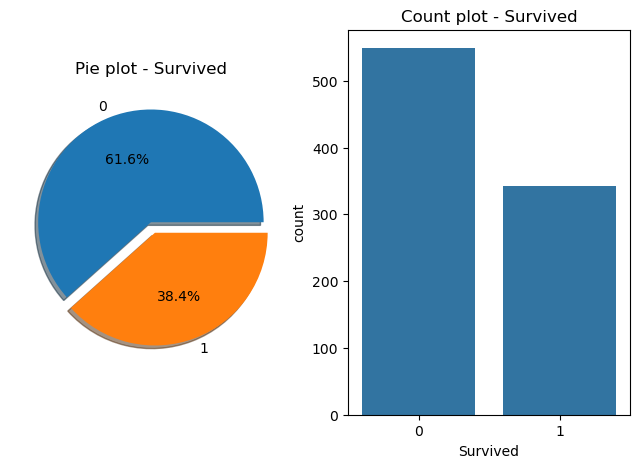

In [43]:
f,ax = plt.subplots(1,2, figsize=(8,5)) #1행 2열로 그래프 생성, 크기 설정
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [51]:
#df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
#df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

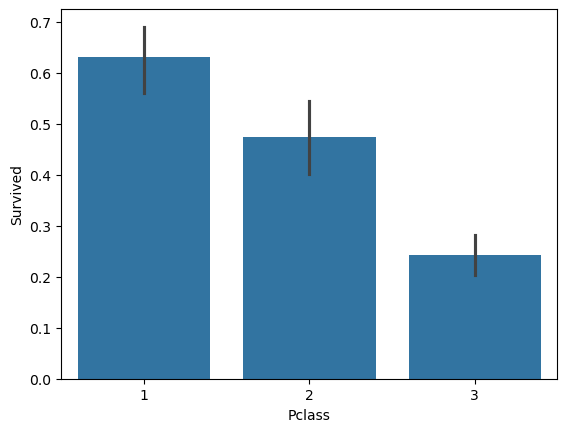

In [23]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

In [49]:
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

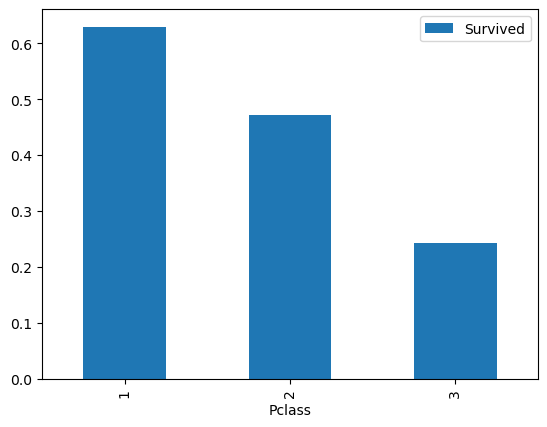

In [53]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_22112\4282195129.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df_train, ci="sd")  # 표준 편차 기반 에러바


<Axes: xlabel='Pclass', ylabel='Survived'>

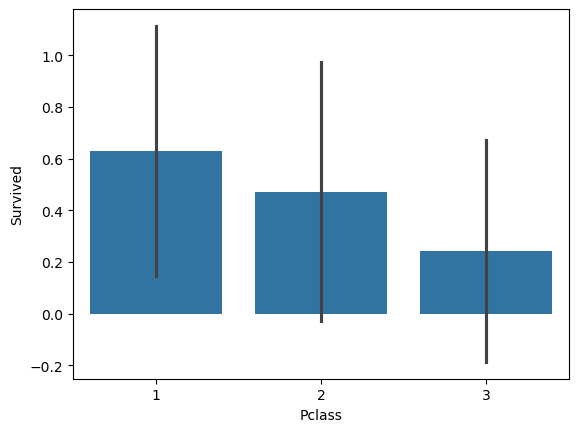

In [55]:
#ci="sd"
#ci는 *Confidence Interval(신뢰 구간)을 설정하는 옵션
#에러바를 표시할 때 표준 편차(Standard Deviation) 기준으로 계산함

sns.barplot(x="Pclass", y="Survived", data=df_train, ci="sd")  # 에러바 길이를 코드로 확인하기(표준 편차 기반 에러바)

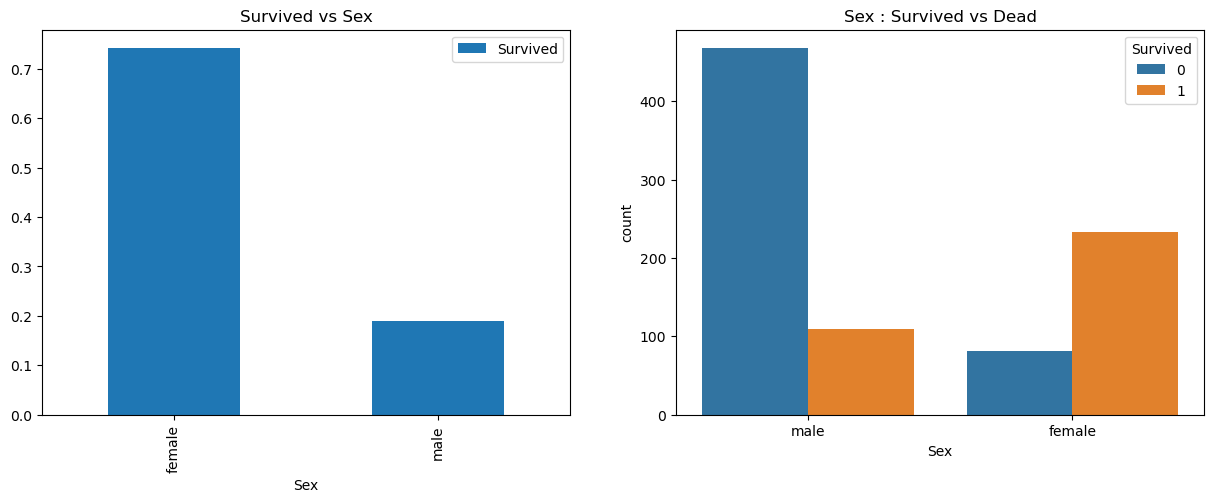

In [45]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

#성별(Sex)에 따른 생존 여부(Survived=0, 1)를 카운트하여 빈도수를 비교하는 그래프
#hue는 Survived의 기준으로 색상을 다르게 적용
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

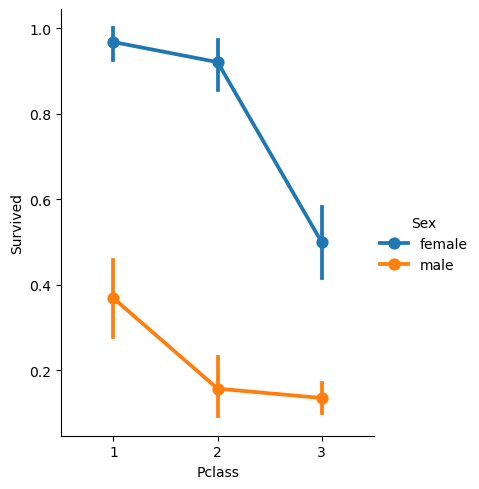

In [71]:
#kind는 그래프를 어떤 형태로 그릴지 지정하는 옵션
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df_train,kind="point",aspect=0.8)

In [103]:
print('제일 나이가 많은 탑승객 : {:d}세'.format(int(df_train['Age'].max())))
print('제일 어린 탑승객 : {:d}세'.format(int(df_train['Age'].min())))
print('탑승객의 평균 나이 : {:.1f}세'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80세
제일 어린 탑승객 : 0세
탑승객의 평균 나이 : 29.7세


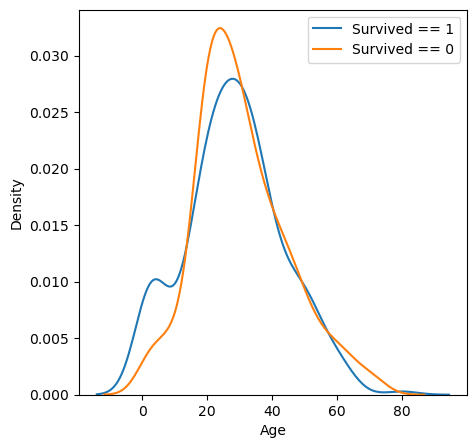

In [37]:
f,ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

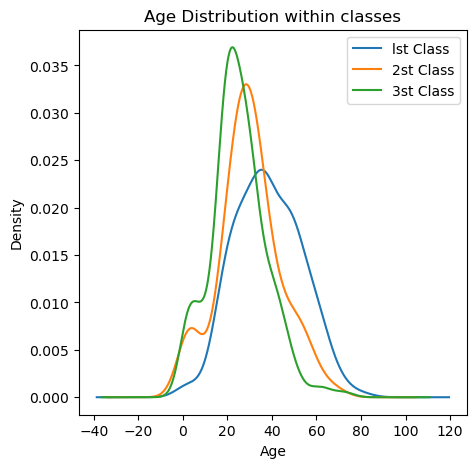

In [39]:
plt.figure(figsize=(5,5))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['lst Class','2st Class','3st Class'])

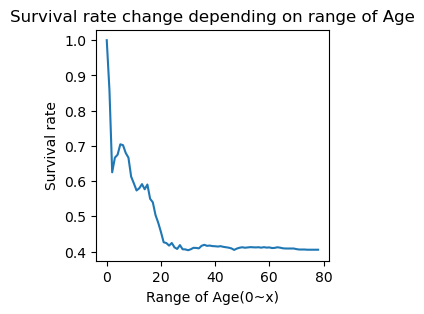

In [31]:
#생존률 = 생존자 수 / 전체 인원수
cummulate_survival_ratio = []
for i in range (1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(3,3))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.xlabel('Range of Age(0~x)')
plt.ylabel('Survival rate')
plt.show()

In [47]:
print(df_train['Embarked'].unique())

['S' 'C' 'Q' nan]


<Axes: xlabel='Embarked'>

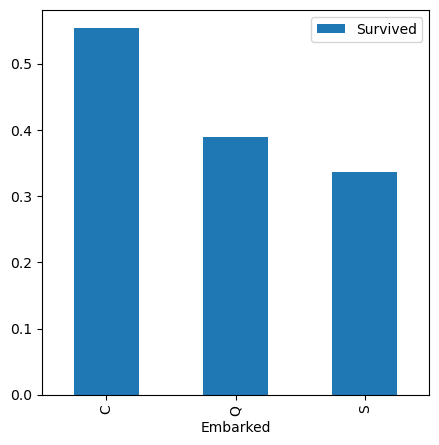

In [60]:
f,ax = plt.subplots(1,1,figsize=(5,5))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [64]:
#보류
print(df_train['Age'].isnull().sum())

177


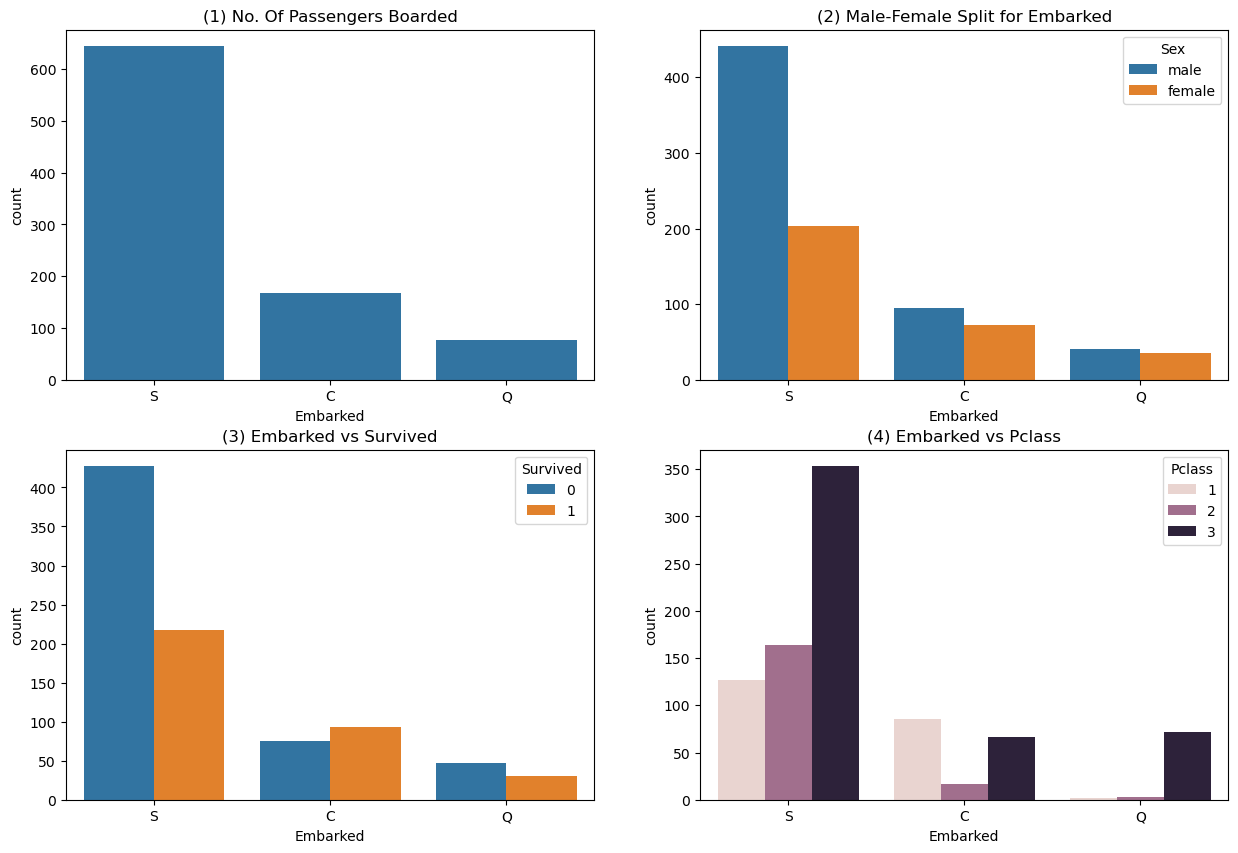

In [29]:
#(1):각 탑승 항구(C, Q, S)별로 얼마나 많은 승객이 탑승했을까?
#(2):각 항구에서 탑승한 승객 중 남성과 여성의 비율은 어떻게 될까?
#(3):각 항구에서 탑승한 승객들의 생존율은 얼마나 될까?
#(4):각 항구에서 탑승한 승객들의 등급(1, 2, 3등석) 분포는 어떨까?

f,ax=plt.subplots(2, 2, figsize=(15,10))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.2) # wspace-가로 간격/ hspace-세로 간격
plt.show()
    
#(1):'S'항구의 승객이 많이 탑승한 것을 볼 수 있다
#(2):전반적으로 남성 승객이 더 많고, 'C','Q'항구의 여성 승객 비율이 높다
#(3):'S'항구의 사망률이 높고 'C'항구의 생존률이 높다는걸 볼 수 있다
#(4):'S'항구의 3등석 비율이 높고 'C'항구의 1등석 비율이 높다

In [51]:
#위 차트보고 추가 작업
embarked_counts = df_train['Embarked'].value_counts()
print("항구별 승객 수 : ",embarked_counts)

embarked_fare = df_train.groupby('Embarke2d')['Fare'].mean().round(1).astype(str) + "원"
print("항구별 평균 요금 : ",embarked_fare)

항구별 승객 수 :  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
항구별 평균 요금 :  Embarked
C    60.0원
Q    13.3원
S    27.1원
Name: Fare, dtype: object


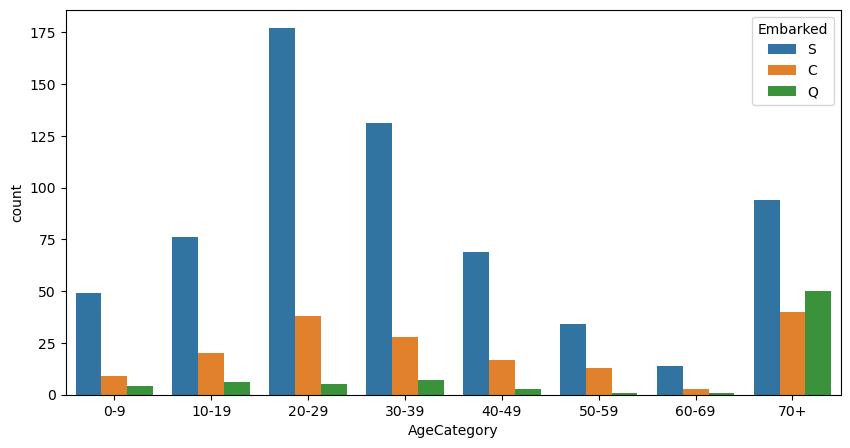

In [76]:
def age_category(age):
    if age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    else:
        return '70+'

df_train['AgeCategory'] = df_train['Age'].apply(age_category)

plt.figure(figsize=(10,5))
sns.countplot(x='AgeCategory', hue='Embarked', data=df_train, order=['0-9', '10-19', '20-29', '30-39','40-49','50-59','60-69','70+'])
plt.show()

In [11]:
#(FamilySize)새로운 특성 생성 
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [80]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


<Axes: xlabel='FamilySize'>

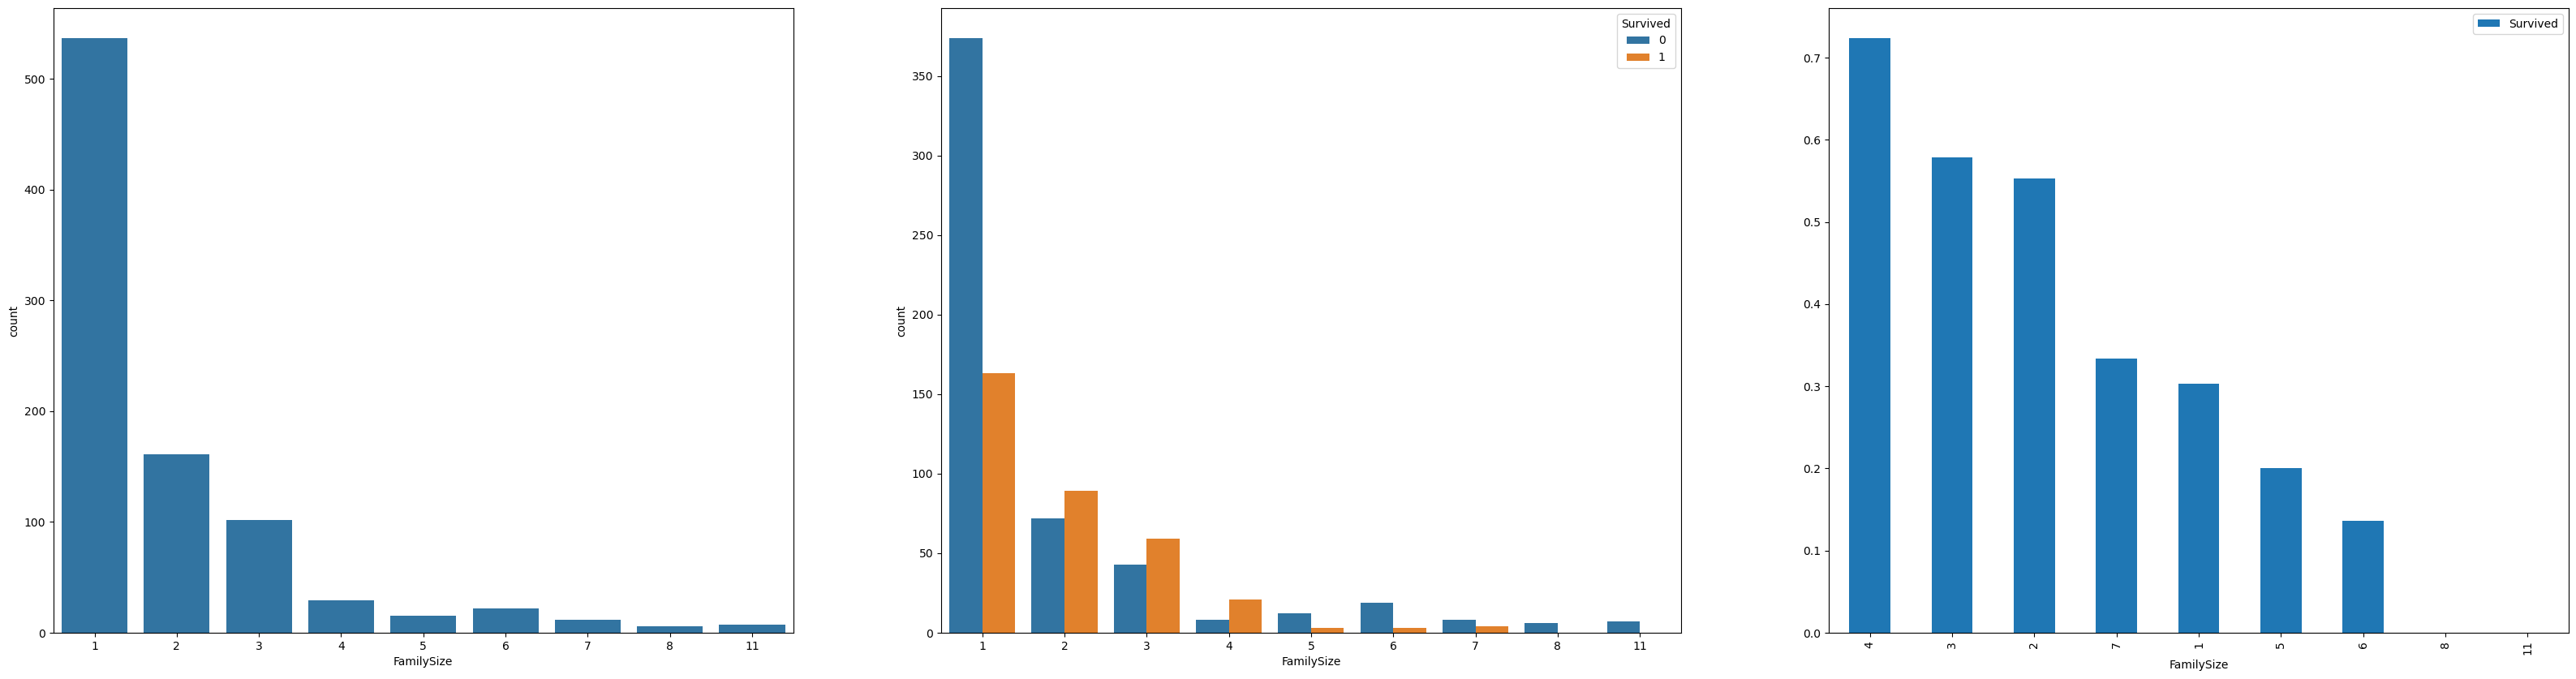

In [100]:
f,ax = plt.subplots(1,3,figsize = (40,10))
sns.countplot(x='FamilySize',data = df_train, ax=ax[0])
sns.countplot(x='FamilySize',hue='Survived',data = df_train, ax=ax[1])
df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_10420\927853987.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train['Fare'], color='r', label ="Skewness : {:.2f}".format(df_train['Fare'].skew()),ax=ax)


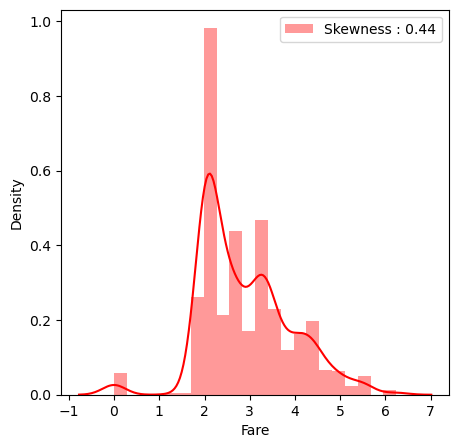

In [40]:
#왜도(.skew()): 데이터 분포의 비대칭 정도를 나타내고, 값이 0에 가까우면 대칭, 양수면 오른쪽 꼬리가 긴 분포, 음수면 왼쪽 꼬리가 긴 분포를 의미 ㅋ 
fig,ax = plt.subplots(1,1,figsize = (5,5))
g = sns.distplot(df_train['Fare'], color='r', label ="Skewness : {:.2f}".format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best') #자동으로 적절한 곳에 배치

In [90]:
#여기서 부터 다시 공부? - 결측치부분(Feature Engineering)
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [34]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

#로그변환 : 왜도를 줄여 정규분포에 가깝게 
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [54]:
# 결측치 갯수 / 데이터 행 수 = 결측치 비율
df_train['Cabin'].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [60]:
df_train['Ticket'].value_counts() #보이는 것처럼 다양한 형태로 묶여져 있음  

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [66]:
print(df_train['Ticket'].count())
print(df_train['Ticket'].nunique())

891
681


In [68]:
#[Ticket_Group_Size]컬럼 생성하기(파생변수) - 단체 티켓 여부를 확인하기 위해서

#Ticket_Group_Size 생성
df_train['Ticket_Group_Size'] = df_train.groupby('Ticket')['Ticket'].transform('count')

# 단체 여부 파생 변수 추가
df_train['Is_Group'] = df_train['Ticket_Group_Size'].apply(lambda x: 'Group' if x > 1 else 'Single')

# 항구별 단체 승객 수 계산
group_counts_by_port = df_train[df_train['Is_Group'] == 'Group'].groupby('Embarked')['Is_Group'].count()
print("항구별 단체 승객 수:")
print(group_counts_by_port)

항구별 단체 승객 수:
Embarked
C     83
Q     18
S    241
Name: Is_Group, dtype: int64


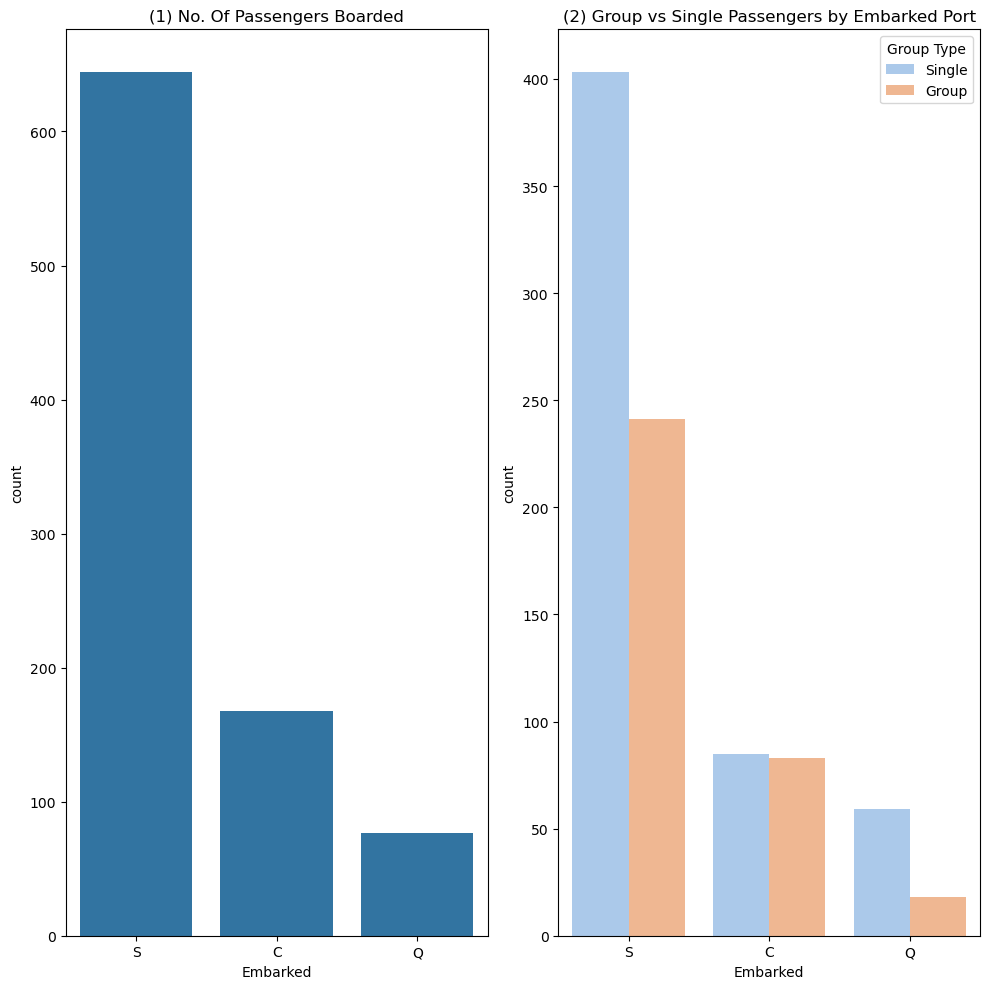

In [82]:
#Ticket과 생존관계와 연관관계 - 항구별 총 승객 수와 항구별 단체 티켁 수 비교
f, ax = plt.subplots(1, 2, figsize=(10, 10))

# (1) 항구별 전체 승객 수 시각화
sns.countplot(x='Embarked', data=df_train, ax=ax[0])  # 1차원 인덱스
ax[0].set_title('(1) No. Of Passengers Boarded')

# (2) 항구별 단체 vs 개인 승객 시각화
sns.countplot(x='Embarked', hue='Is_Group', data=df_train, ax=ax[1], palette='pastel')  # 1차원 인덱스
ax[1].set_title('(2) Group vs Single Passengers by Embarked Port')
ax[1].legend(title='Group Type')

plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()

3. 특성공학

In [18]:
#Age가 null값 데이터 추출
null_age = df_train[df_train['Age']

    PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  
5       0      0  330877   8.4583   NaN        Q  
17      0      0  244373  13.0000   NaN        S  
19      0      0    2649   7.2250   NaN        C  
26      0      0    2631   7.2250   NaN        C  
28      0      0  330959   7.8792   NaN        Q  


In [15]:
#str.extract()의 역할
#[A-Za-z] : 알파벳()
# + : 알파벳이 1개 이상 연속으로 오는 경우
# \. : 마침표(.)가 뒤에 오는 경우
# () : 추출하고자 하는 패턴을 그룹화

#새로운 열 Initial에 저장
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ghfkd\AppData\Local\Temp\ipykernel_5968\3778779890.py:8: SyntaxWarning: invalid escape sequence '\.'
  df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
C:\Users\ghfkd\AppData\Local\Temp\ipykernel_5968\3778779890.py:9: SyntaxWarning: invalid escape sequence '\.'
  df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')


In [30]:
#r교차표의 행과 열을 뒤집기 전
cross_tab = pd.crosstab(df_train['Initial'], df_train['Sex'])
print(cross_tab)

Sex       female  male
Initial               
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [34]:
#.T를 사용한 전치(transpose)
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [31]:
#생성된 Initial에 열 값들 확인하기
print(df_train['Initial'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [29]:
df_train[(df_train['Initial'] == 'Dr') & (df_train['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,Dr


In [46]:
# 객체가 너무 많기 때문에 간단하게 호칭 통일성을 만들어줌 
df_train['Initial'] = df_train['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr']
)

df_test['Initial'] = df_test['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr']
)

In [50]:
#(numeric_only=Ture) : 숫자형 데이터만 선택적 계산되도록 지시 왜 이 코드가 필요한지 모르곘다(다시공부)
#결측치가 있는 부분에 Initial를 맞춰서 평균값을 채워 넣기위해?
df_train.groupby('Initial').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


<Axes: xlabel='Initial'>

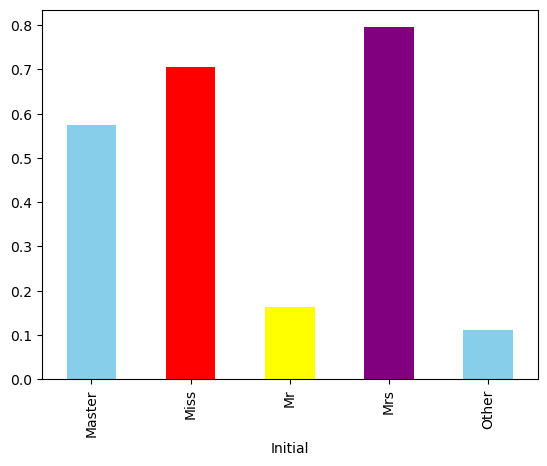

In [60]:
df_train.groupby('Initial')['Survived'].mean().plot.bar(color=['skyblue','red','yellow','purple'])

In [17]:
#위에 표를 참고하여 (Age)결측값이 있는 부분을 채워줄 것이다[train,test둘다 변경해줘야함]
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [35]:
#확인해보면 이제 결측치가 없는 것을 볼 수 있다
#df_train['Age'].isnull().sum()
#df_train.isnull().sum()[df_train.isnull().sum()>0]
df_test.isnull().sum()[df_test.isnull().sum()>0]

Age        1
Fare       1
Cabin    327
dtype: int64

In [82]:
#다음으로 embarked의 결측치 채우기
# 승객이 제일 많은'S'항구로 채워야 패턴 왜곡을 최소화할 수 있음
df_train['Embarked'].fillna('S', inplace=True)

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_16672\1664436857.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna('S',inplace=True)


In [45]:
#무슨 작업인지 모르겠당
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [24]:
#다시공부
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     62
1    102
2    220
3    167
4     89
5     48
6     19
7    184
Name: PassengerId, dtype: int64

In [ ]:
#머신러닝은 문자열을 읽을 수 없다  
#그래서 Initial,Embarked,Sex 등의 문자열을 숫자형으로 데이터변환을 시켜줘야하기 때문에
#데이터를 변환하려면 df_train[] = df_train[].map({}) 형태로 적어줘야함

In [19]:
#사전적 순서 : Mr -> Mrs -> Miss -> Master -> Other순서로
df_train['Initial'] = df_train['Initial'].map({'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Other' : 4})

#탑승객이 많은 항구 순서대로(S->C->Q)
df_train['Embarked'] = df_train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

#사전적 순서 : 알파벳 f가 m보다 먼저이기 때문에
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

In [113]:
#결측치가 있는지 다시 한번 확인 / dtype이 int형으로 바뀐지도 확인
#df_train['Embarked'].isnull().any , df_train['Embarked'].dtypes
df_train['Sex'].isnull().any , df_train['Sex'].dtypes

(<bound method Series.any of 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 886    False
 887    False
 888    False
 889    False
 890    False
 Name: Sex, Length: 891, dtype: bool>,
 dtype('int64'))

<Axes: >

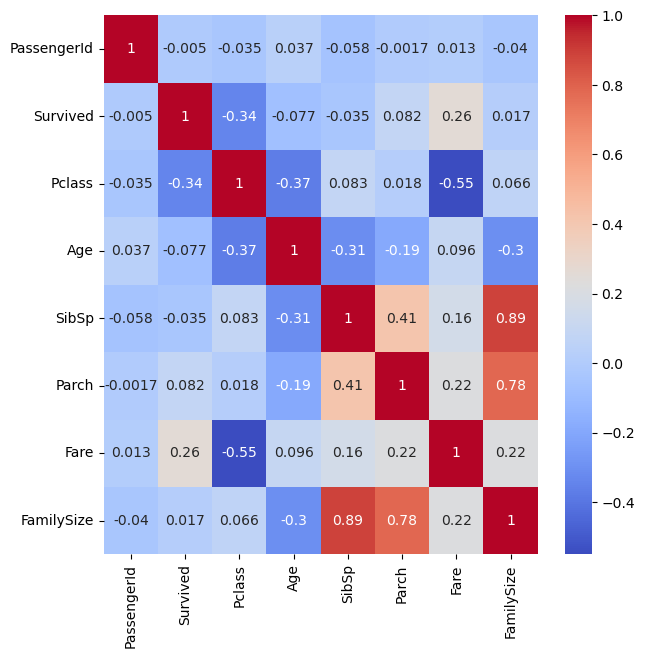

In [14]:
#어렵습니다(상관관계 히트맵) 읽는 방법 잘 알아두기
plt.figure(figsize=(7,7))
df_numeric = df_train.select_dtypes(include=['number'])  # 숫자형 열만 선택
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')# 히트맵 생성

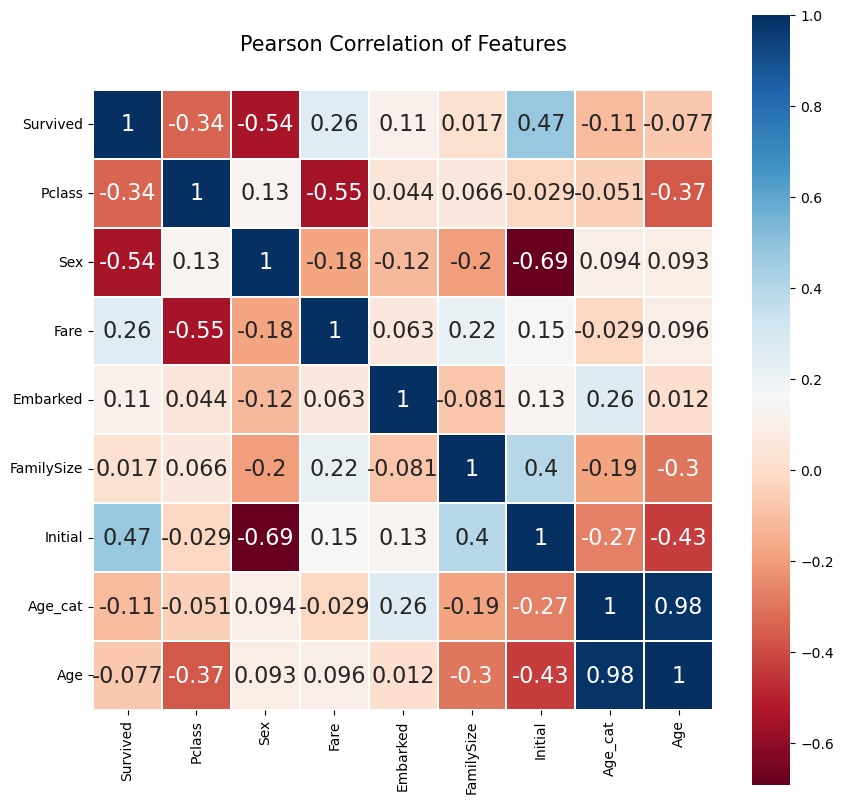

In [36]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu #동일한 색상 팔레트 사용
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [ ]:
# 위 EDA과정에서 얻은 결과
# - Sex와 Pclass는 생존률 예측에 중요한 변수로 적용할 수 있다는 것을 발견
# - Fare와 Embarked도 생존 여부와 의미 있는 관계를 가질 수 있음을 확인
# - 변수 간 중복 정보가 거의 없음을 발견, 불필요한 변수를 제거할 필요가 없음을 발견

In [21]:
# One-hot encoding : 카테고리형 범주형 변수를 0과 1로 이루어진 다차원 백터로 표현하는 기법(두 군데 다 해주기)
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [23]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [43]:
df_train.head() #One-hot encoding이 되었는지 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,2,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,2,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,2,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,1,True,False,False,False


In [25]:
df_train[['Initial_Master', 'Initial_Miss', 'Initial_Mr', 'Initial_Mrs']] = df_train[['Initial_Master', 'Initial_Miss', 'Initial_Mr', 'Initial_Mrs']].astype(int)

KeyError: "None of [Index(['Initial_Master', 'Initial_Miss', 'Initial_Mr', 'Initial_Mrs'], dtype='object')] are in the [columns]"

In [47]:
print(df_train[['Initial_Master', 'Initial_Miss', 'Initial_Mr', 'Initial_Mrs']].head())

   Initial_Master  Initial_Miss  Initial_Mr  Initial_Mrs
0               1             0           0            0
1               0             1           0            0
2               0             0           1            0
3               0             1           0            0
4               1             0           0            0


In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,2,1,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,2,0,1,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,0,0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,2,0,1,0,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,1,1,0,0,0,3


In [27]:
# True & False로 나올 때 0과1로 바꾸는 명령어
df_train[['Initial_0.0', 'Initial_1.0', 'Initial_2.0', 'Initial_3.0']] = \
df_train[['Initial_0.0', 'Initial_1.0', 'Initial_2.0', 'Initial_3.0']].astype(int)